In [1]:
# Jupyter magic

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cma

import sys
sys.path.append('/home/ubuntu/proj/bayesian-algorithm-execution')

from bax.estool.es import CMAES

In [3]:
# Set random seed

random_seed = 11
np.random.seed(random_seed)

In [4]:
# from https://github.com/CMA-ES/pycma/blob/master/cma/fitness_functions.py

def rastrigin(x):
  """Rastrigin test objective function, shifted by 10. units away from origin"""
  x = np.copy(x)
  x -= 10.0
  if not np.isscalar(x[0]):
    N = len(x[0])
    return -np.array([10 * N + sum(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])
  N = len(x)
  return -(10 * N + sum(x**2 - 10 * np.cos(2 * np.pi * x)))

fit_func = rastrigin

In [5]:
NPARAMS = 10         # make this a 10-dimensinal problem.
NPOPULATION = 50     # use population size of 50.
MAX_ITERATION = 40   # run each solver for 40 generations.

In [6]:
def query_generation(solutions):
    """Perform a single generation of ES"""
    fitness_list = np.zeros(len(solutions))
    fitness_list_predict = np.zeros(len(solutions))
    
    for i in range(len(solutions)):
        fitness_list[i] = fit_func(solutions[i])
        fitness_list_predict[i] = fit_func(solutions[i])
    
    return fitness_list, fitness_list_predict

In [7]:
# defines a function to use solver to solve fit_func

def test_solver(solver, print_mod=10):
  all_fitness_list = []
  all_fitness_list_predict = []
  history = []

  for j in range(MAX_ITERATION):
    solutions = solver.ask()
    
    fitness_list, fitness_list_predict = query_generation(solutions)

    solver.tell(fitness_list)
    
    all_fitness_list.extend(fitness_list)
    all_fitness_list_predict.extend(fitness_list_predict)
    
    result = solver.result() # first element is the best solution, second element is the best fitness
    history.append(result[1])

    if (j+1) % print_mod == 0:
      print("fitness at iteration", (j+1), result[1])

  print("local optimum discovered by solver:\n", result[0])
  print("fitness score at this local optimum:", result[1])
  return history, all_fitness_list

In [8]:
# Initial point

x = np.zeros(NPARAMS)

print(f'Initial point x = {x}')
print(f'f(x) = {fit_func(x)}')

Initial point x = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
f(x) = -1000.0


In [9]:
# Optimal point

x = np.ones(NPARAMS)*10.0

print(f'Global optimum point x = {x}')
print(f'f(x) = {fit_func(x)}')

Global optimum point x = [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
f(x) = -0.0


In [10]:
# defines CMA-ES algorithm solver

cmaes = CMAES(NPARAMS,
              popsize=NPOPULATION,
              weight_decay=0.0,
              sigma_init = 0.5
          )

(25_w,50)-aCMA-ES (mu_w=14.0,w_1=14%) in dimension 10 (seed=208095, Sat Oct 31 17:26:30 2020)


In [11]:
cma_history, cma_fitness_list = test_solver(cmaes)

fitness at iteration 10 -357.0992836939197
fitness at iteration 20 -99.8931158640132
fitness at iteration 30 -74.31679027628462
fitness at iteration 40 -49.58131790630017
local optimum discovered by solver:
 [ 8.93872339 10.03706368 11.12925789  9.82133063 10.97074469  8.85172504
  9.71069497 10.34600271 11.02055317 11.04282885]
fitness score at this local optimum: -49.58131790630017


In [12]:
# Compute best-so-far (bsf) array

cma_bsf = np.maximum.accumulate(cma_fitness_list)

(-2000.0, 50.0)

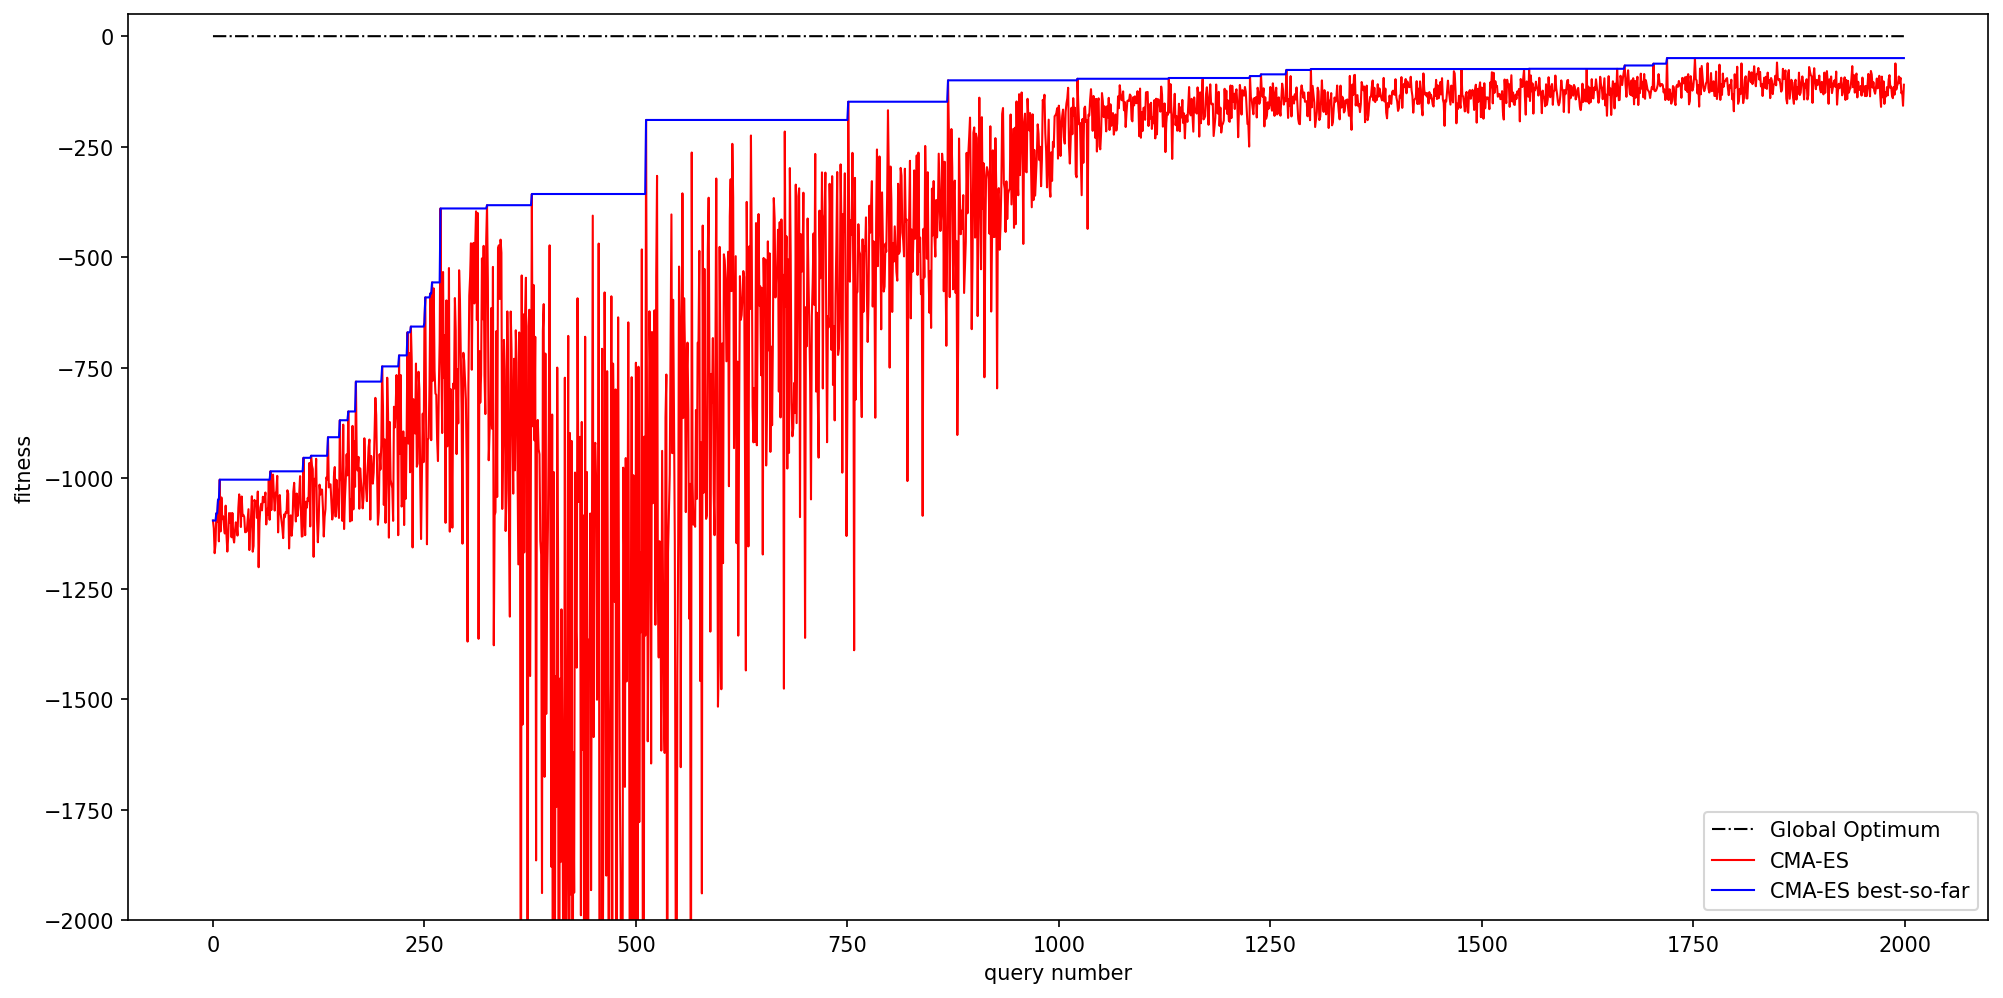

In [13]:
best_history = [0] * MAX_ITERATION * NPOPULATION
plt.figure(figsize=(16,8), dpi=150)

optimum_line, = plt.plot(best_history, color="black", linewidth=1.0, linestyle="-.", label='Global Optimum')
cma_line, = plt.plot(cma_fitness_list, color="red", linewidth=1.0, linestyle="-", label='CMA-ES')
cma_bsf_line, = plt.plot(cma_bsf, color="blue", linewidth=1.0, linestyle="-", label='CMA-ES best-so-far')

plt.legend(handles=[optimum_line, cma_line, cma_bsf_line], loc=4)

plt.xlabel('query number')
plt.ylabel('fitness')

plt.ylim([-2000, 50])

# plt.savefig("./rastrigin_example.svg")